In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color, util, transform as trans, filters, feature
import os
from scipy import ndimage, signal
from sklearn import cluster

In [6]:
images_path = os.path.join('dataset', 'images')

def get(filename):
    return np.array(Image.open(os.path.join(images_path, filename)))

def by_id(i):
    return get(f'{i}.jpg')

def random_images(k=1):
    return tuple(map(get, np.random.choice(os.listdir(images_path), k)))

def hsv_gray(image):
    return color.rgb2gray(color.rgb2hsv(image))

def levels(image, f=np.nansum):
    return f(image, axis=0), f(image, axis=1)

def freqs(image):
    w, h = image.shape
    freq_x = np.fft.fftfreq(w, 1)
    freq_y = np.fft.fftfreq(h, 1)
    fft_x = np.abs(np.fft.fft(np.nansum(image, axis=1)))
    fft_y = np.abs(np.fft.fft(np.nansum(image, axis=0)))
    vals_x, vals_y = freq_x[fft_x == np.sort(fft_x)[-2]], freq_y[fft_y == np.sort(fft_y)[-2]]
    return np.abs(vals_x[0]), np.abs(vals_y[0])

def fft2d(image):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(image)))

def ifft2d(image):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(image)))

def peaks_filter(x, y, peaks, k=1):
    ypeaks = y[peaks]
    xpeaks = x[peaks]
    max_peak = peaks[ypeaks == ypeaks.max()]
    for _ in range(k-1):
        max_peak = peaks[ypeaks == ypeaks[np.isin(ypeaks, y[x < x[max_peak][0]])].max()]
    return max_peak

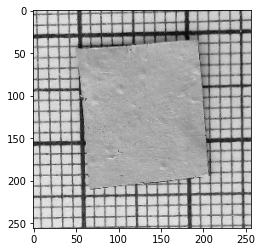

In [7]:
image = random_images()[0]
imgray = color.rgb2gray(image)
plt.imshow(imgray, cmap='gray')

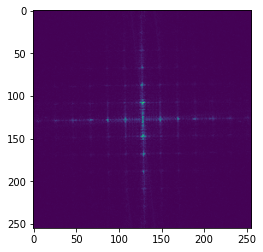

In [8]:
fft = np.abs(fft2d(imgray))
xfreqs = np.fft.ifftshift(np.fft.fftfreq(fft.shape[0], 1))
yfreqs = np.fft.ifftshift(np.fft.fftfreq(fft.shape[1], 1))
plt.imshow(fft[(xfreqs != 0) &  (yfreqs != 0)])

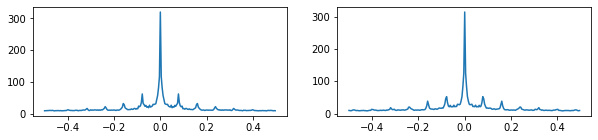

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 2))
ymean = np.mean(fft, axis=1)
xmean = np.mean(fft, axis=0)
axs[0].plot(yfreqs, ymean)
axs[1].plot(xfreqs, xmean)

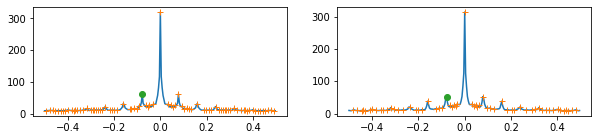

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 2))
(ypeaks, _), (xpeaks, _) = signal.find_peaks(ymean), signal.find_peaks(xmean)
Py = peaks_filter(yfreqs, ymean, ypeaks, 2)
Px = peaks_filter(xfreqs, xmean, xpeaks, 2)

axs[0].plot(yfreqs, ymean)
axs[0].plot(yfreqs[ypeaks], ymean[ypeaks], '+')
axs[0].plot(yfreqs[Py], ymean[Py], 'o')
axs[1].plot(xfreqs, xmean)
axs[1].plot(xfreqs[xpeaks], xmean[xpeaks], '+')
axs[1].plot(xfreqs[Px], xmean[Px], 'o')

In [12]:
xfreqs[Px][0], yfreqs[Py][0]

(-0.078125, -0.078125)